# 서포트 벡터 머신을 사용한 최대 마진 분류

* SVM은 마진을 최대화하는 방법으로 분류한다.
* 마진은 초평면(결정경계)과 초평면에 가장 가까운 훈련 샘플 사이의 거리를 뜻한다.
* 초평면에 가장 가까운 샘플을 support verctor라고 한다.

In [ ]:
from sklearn import datasets
import numpy as np

### iris 데이터 셋

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### 해당 데이터 셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### 데이터 스케일 맞추기

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 결정경계 시각화

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions (X,y, classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  # meshgrid는 축에 해당하는 1차원 배열을 입력받아 벡터 공간의 모든 좌표를 담은 행렬을 반환한다.

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravel은 입력된 배열을 1차원으로 펼친다.
  # 펼친 2개의 배열을 붙여서 하나의 행렬을 생성, T transpose하여 2개의 열을 만든다. 이 2 열이 xy평면의 좌표이다.

    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha=0.5, levels=[-1,0,1], linestyles=['--','-','--'])
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 같은 Z값을 가지는 영역을 색으로 칠한다. contour는 그리기만, countourf는 색깔칠하기
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x= X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl)



### SVM 모형

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear', C=100.0)
svm.fit(X_train_std, y_train)

SVC(C=100.0, kernel='linear')

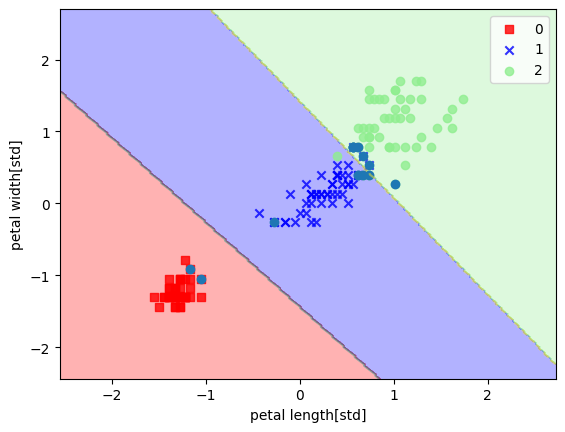

In [ ]:
X_com_std = np.vstack((X_train_std, X_test_std))
y_com = np.hstack((y_train, y_test))

plot_decision_regions(X_com_std, y_com, classifier=svm)
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1])

plt.xlabel('petal length[std]')
plt.ylabel('petal width[std]')
plt.legend()
plt.show()

In [ ]:
print("훈련 데이터 정확도:", svm.score(X_train_std, y_train))
print("테스트 데이터 정확도:", svm.score(X_test_std, y_test))

훈련 데이터 정확도: 0.9523809523809523
테스트 데이터 정확도: 0.9777777777777777


In [ ]:
svm.support_vectors_

array([[-1.05383474, -1.04507821],
       [-1.16537974, -0.91397521],
       [-0.27301968, -0.2584602 ],
       [ 0.61934037,  0.3970548 ],
       [ 0.61934037,  0.3970548 ],
       [ 0.56356787,  0.79036381],
       [ 0.73088538,  0.5281578 ],
       [ 0.67511288,  0.65926081],
       [ 0.56356787,  0.79036381],
       [ 1.0097479 ,  0.2659518 ],
       [ 0.56356787,  0.79036381],
       [ 0.61934037,  0.79036381],
       [ 0.73088538,  0.3970548 ],
       [ 0.67511288,  0.3970548 ]])

### 규제
규제의 강도를 결정하는 매개변수는 C이다.   
C값이 높아지면 규제가 감소한다. 값이 작아지면 데이터 포인트 중 다수에 맞추려고 하며(에러를 일부 허용), 커지면 개개의 데이터 포인트를 정확히 분류하려고 한다.  

즉, C값을 줄이면 과대적합(overfitting)을 줄일 수 있다.

## 실습
1. 위의 iris dataset에 대한 예제에서 규제를 제어하는 매개변수 C의 값을 0.001 로 했을때, 100.0으로 했을 때 생성되는 결정경계를 비교해 보시오.